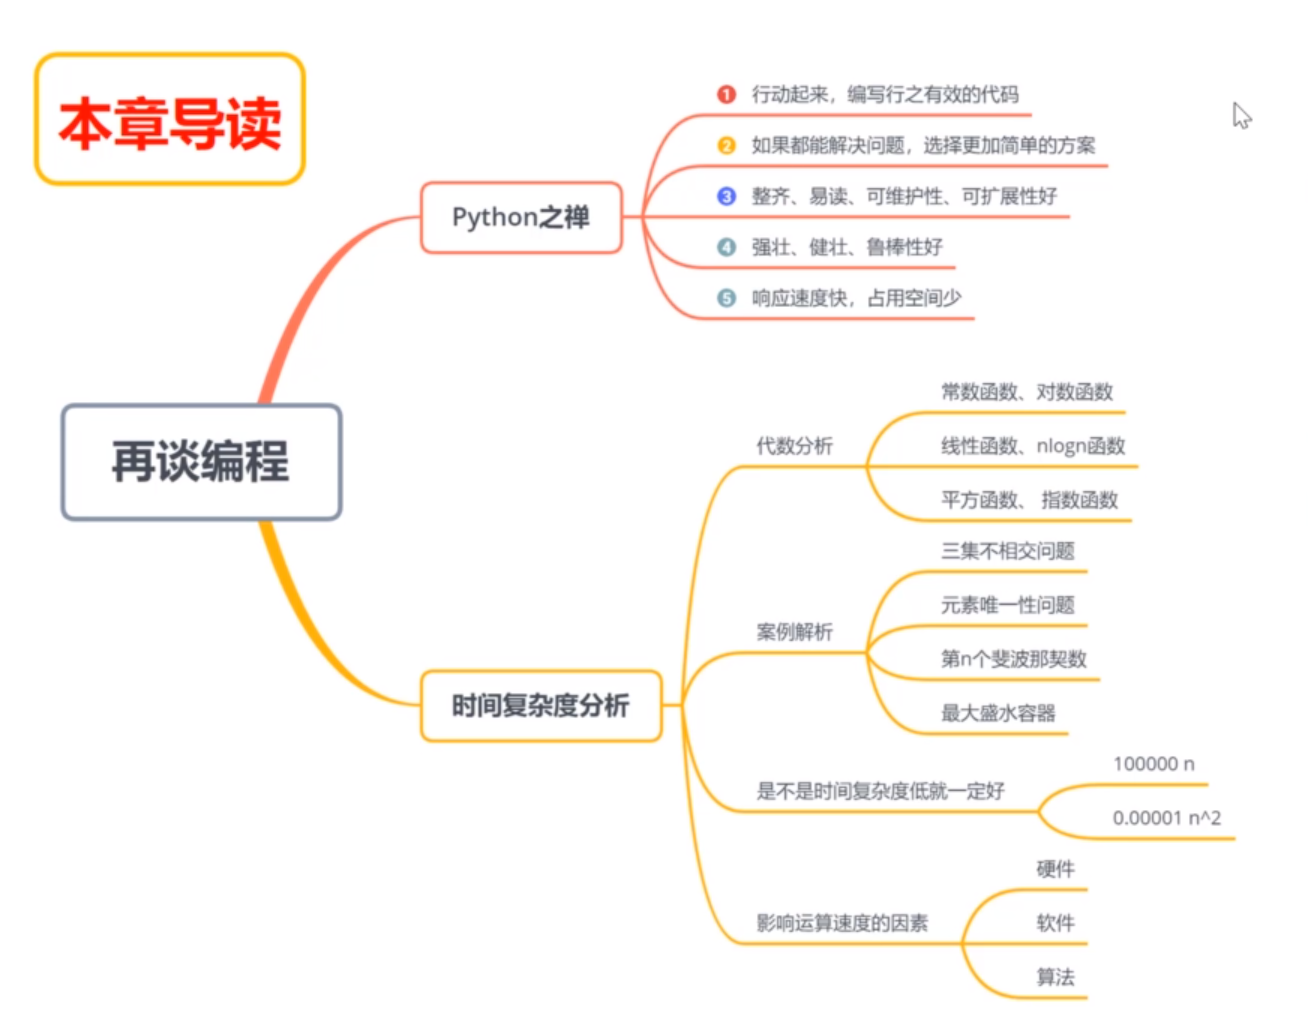

# 第十五章 再谈编程

## 1）Python之禅

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# 2）时间复杂度分析

**【1】代数分析**

**求最大值和排序**

In [2]:
import numpy as np
x = np.random.randint(100, size=10)
x

array([23, 50, 11, 94, 83, 46, 35, 11, 35,  9])

- 寻找最大值的时间复杂度为O(n)

- 选择排序时间复杂度O(n^2)

**代数分析**

In [3]:
def one(x):
    """常数函数"""
    return np.ones(len(x))

def log(x):
    """对数函数"""
    return np.log(x)

def equal(x):
    """线性函数"""
    return x

def n_logn(x):
    """nlogn函数"""
    return x*np.log(x)

def square(x):
    """平方函数"""
    return x**2

def exponent(x):
    """指数函数"""
    return 2**x

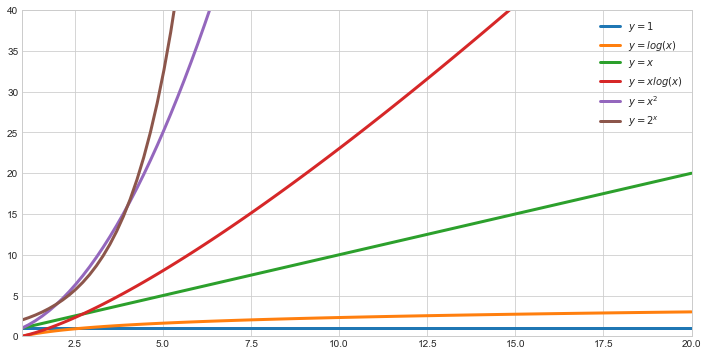

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

t = np.linspace(1, 20, 100)
methods = [one, log, equal, n_logn, square, exponent]
method_labels = ['$y = 1$', '$y = log(x)$', '$y = x$', '$y = xlog(x)$', '$y = x^2$', '$y = 2^x$']
plt.figure(figsize=(12, 6))
for method, method_label in zip(methods, method_labels):
    plt.plot(t, method(t), label=method_label, lw=3)
plt.xlim(1, 20)
plt.ylim(0, 40)
plt.legend()

**我们的最爱：常数函数、对数函数**

**勉强接受：线性函数、nlogn函数**

**难以承受：平方函数、指数函数**

**【2】三集不相交问题**

问题描述：假设有A、B、C三个序列，任一序列内部没有重复元素，欲知晓三个序列交集是否为空

In [5]:
import random
def creat_sequence(n):
    A = random.sample(range(1, 1000), k=n)
    B = random.sample(range(1000, 2000), k=n)
    C = random.sample(range(2000, 3000), k=n)
    return A, B, C

In [6]:
A, B, C = creat_sequence(100)
def no_intersection_1(A, B, C):
    for a in A:
        for b in B:
            for c in C:
                if a == b == c:
                    return False
    return True

%timeit no_intersection_1(A, B, C)

40 ms ± 1.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
def no_intersection_2(A, B, C):
    for a in A:
        for b in B:
            if a == b:
                for c in C:
                    if a == c:
                        return False
    return True

%timeit no_intersection_2(A, B, C)

413 µs ± 59.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
import time

res_n_3 = []
res_n_2 = []

for n in [10, 20, 100]:
    A, B, C = creat_sequence(n)
    start_1 = time.time()
    for i in range(100):
        no_intersection_1(A, B, C)
    end_1 = time.time()
    for i in range(100):
        no_intersection_2(A, B, C)
    end_2 = time.time()
    res_n_3.append(str(round((end_1 - start_1)*1000))+'ms')
    res_n_2.append(str(round((end_2 - end_1)*1000))+'ms')    
    
print('{0:<23}{1:<15}{2:<15}{3:<15}'.format('方法', 'n=10', 'n=20', 'n=100'))
print('{0:<23}{1:<15}{2:<15}{3:<15}'.format('no_intersection_1', *res_n_3))
print('{0:<23}{1:<15}{2:<15}{3:<15}'.format('no_intersection_2', *res_n_2))

方法                     n=10           n=20           n=100          
no_intersection_1      5ms            39ms           4059ms         
no_intersection_2      0ms            1ms            28ms           


**【3】元素唯一性问题**

问题描述：A中的元素是否唯一

In [10]:
def unique_1(A):
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            if A[i] == A[j]:
                return False
    return True

In [11]:
def unique_2(A):
    A_sort = sorted(A)
    for i in range(len(A_sort)-1):
        if A[i] == A[i+1]:
            return False
    return True

In [14]:
import random
res_n_2 = []
res_n_log_n = []

for n in [100, 1000]:
    A = list(range(n))
    random.shuffle(A)
    start_1 = time.time()
    for i in range(100):
        unique_1(A)
    end_1 = time.time()
    for i in range(100):
        unique_2(A)
    end_2 = time.time()
    res_n_2.append(str(round((end_1 - start_1)*1000))+'ms')
    res_n_log_n.append(str(round((end_2 - end_1)*1000))+'ms')    
    
print('{0:<13}{1:<15}{2:<15}'.format('方法', 'n=10', 'n=20', 'n=100'))
print('{0:<15}{1:<15}{2:<15}'.format('unique_1', *res_n_2))
print('{0:<15}{1:<15}{2:<15}'.format('unique_2', *res_n_log_n))

方法           n=10           n=20           
unique_1       52ms           3728ms         
unique_2       1ms            19ms           


**【4】第n个斐波那契函数**

a(n+1) = a(n+1) + a(n)

In [15]:
def bad_fibonacci(n):
    if n <= 1:
        return n
    else:
        return bad_fibonacci(n-2) + bad_fibonacci(n-1)

O(2^n)

In [17]:
def good_fibonacci(n):
    i, a, b = 0, 0, 1
    while i < n:
        a, b = b, a+b
        i += 1
    return a

O(n)

In [18]:
%timeit bad_fibonacci(10)

26.9 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%timeit good_fibonacci(10)

1.16 µs ± 19 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


**【5】最大盛水容器**

**暴力求解——双循环**

In [20]:
def max_area_double_cycle(height):
    """暴力穷举双循环"""
    i_left, i_right, max_area = 0, 0, 0
    for i in range(len(height)-1):
        for j in range(i+1, len(height)):
            area = (j-i) * min(height[j], height[i])
            if area > max_area:
                i_left, i_right, max_area = i, j, area
    return i_left, i_right, max_area

In [21]:
height = np.random.randint(1, 50, size=10)
print(height)
max_area_double_cycle(height)

[16 29 11 30 48 36 20 34 31 36]


(1, 9, 232)

([<matplotlib.axis.XTick at 0x26c780e7f98>,
 <a list of 10 Text xticklabel objects>)

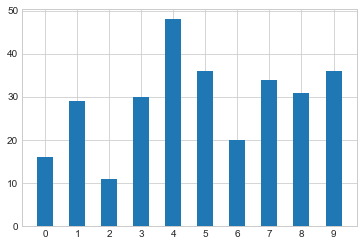

In [33]:
import matplotlib.pyplot as plt

height = [16, 29, 11, 30, 48, 36, 20, 34, 31, 36]
plt.bar(range(10), height, width=0.5)
plt.xticks(range(0, 10, 1))

**双向指针**

In [27]:
def max_area_bothway_points(height):
    """双向指针"""
    i = 0
    j = len(height)-1
    i_left, j_right, max_area = 0, 0, 0
    while i < j:
        area = (j-i) * min(height[i], height[j])
        if area > max_area:
            i_left, j_right, max_area = i, j, area
        if height[i] == min(height[i], height[j]):
            i += 1
        else:
            j -= 1
    return i_left, j_right, max_area

In [28]:
max_area_bothway_points(height)

(1, 9, 232)

In [29]:
double_cycle = []
bothway_points = []

for n in [5, 50, 500]:
    height = np.random.randint(1, 50, size=10)
    start_1 =time.time()
    for i in range(100):
        max_area_double_cycle(height)
        end_1 = time.time()
    for i in range(100):
        max_area_bothway_points(height)
    end_2 = time.time()
    double_cycle.append(str(round((end_1 - start_1)*1000))+'ms')
    bothway_points.append(str(round((end_2 - end_1)*1000))+'ms')    
    
print('{0:<15}{1:<15}{2:<15}{3:<15}'.format('方法', 'n=5', 'n=50', 'n=500'))
print('{0:<13}{1:<15}{2:<15}{3:<15}'.format('暴力循环', *double_cycle))
print('{0:<13}{1:<15}{2:<15}{3:<15}'.format('双向指针', *bothway_points))

方法             n=5            n=50           n=500          
暴力循环         4ms            4ms            4ms            
双向指针         2ms            1ms            2ms            


**【6】是不是时间复杂度低就一定好**

100000n VS 0.00001n^2

**【7】影响运算速度的因素**

- 硬件

- 软件

- 算法